In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)

In [2]:
# grab mnist dataset
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('../data/MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# MNIST data image of shape 28 * 28 = 784
n_features = 28 * 28
# there are 10 digits 0 ~ 9
n_classes = 10

In [5]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, n_features])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, n_classes])

In [6]:
# variables
W = tf.Variable(tf.random_normal([n_features, n_classes]), name='weight')
b = tf.Variable(tf.random_normal([n_classes]), name='bias')

In [7]:
# hypoethesis
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [8]:
# loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [9]:
# optimizer
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [11]:
# hyper parameters
lr = 0.1
training_epochs = 100
batch_size = 200

Epoch: 0001 cost = 4.114214563
Epoch: 0002 cost = 1.530929253
Epoch: 0003 cost = 1.142260440
Epoch: 0004 cost = 0.968999422
Epoch: 0005 cost = 0.867736959
Epoch: 0006 cost = 0.798704204
Epoch: 0007 cost = 0.749200316
Epoch: 0008 cost = 0.710646632
Epoch: 0009 cost = 0.679439394
Epoch: 0010 cost = 0.653367372
Epoch: 0011 cost = 0.630692393
Epoch: 0012 cost = 0.611935920
Epoch: 0013 cost = 0.595007852
Epoch: 0014 cost = 0.580045041
Epoch: 0015 cost = 0.566693564
Epoch: 0016 cost = 0.554400768
Epoch: 0017 cost = 0.543420343
Epoch: 0018 cost = 0.533369329
Epoch: 0019 cost = 0.523987991
Epoch: 0020 cost = 0.515117663
Epoch: 0021 cost = 0.507399438
Epoch: 0022 cost = 0.499618605
Epoch: 0023 cost = 0.492880769
Epoch: 0024 cost = 0.486258377
Epoch: 0025 cost = 0.480087358
Epoch: 0026 cost = 0.474147913
Epoch: 0027 cost = 0.468765296
Epoch: 0028 cost = 0.463664472
Epoch: 0029 cost = 0.458645085
Epoch: 0030 cost = 0.453943294
Epoch: 0031 cost = 0.449531507
Epoch: 0032 cost = 0.445108889
Epoch: 0

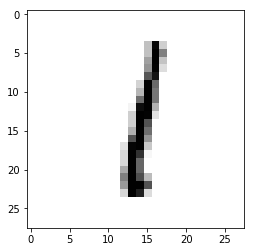

In [12]:
with tf.Session() as sess:
    # initialize 
    sess.run(tf.global_variables_initializer())
    
    # training
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys, learning_rate: lr})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()